In [189]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['fake_submission.csv', 'train_labels.npy', 'train_images.npy', 'test_images.npy']


In [190]:
#Loading Data
train_X = np.load('../input/train_images.npy')
train_Y = np.load('../input/train_labels.npy')
test_X = np.load('../input/test_images.npy')

In [191]:
import matplotlib.pyplot as plt

#Understand Shape of Data
print(train_X.shape, train_Y.shape)
print(test_X.shape)

#Understand Classes in Data
classes = np.unique(train_Y)
num_classes = len(classes)
print(num_classes)
print(classes)

Training Data Shape :  (55000, 784) (55000,)
Testing Data Shape :  (5000, 784)


In [ ]:
from sklearn.decomposition import PCA

#Perform PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(train_X)

In [ ]:
#Visualize PCA
plt.scatter(projected[:, 0], projected[:, 1], s=3,
            c=train_Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

In [175]:
#Split Data into Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(train_X, train_Y, test_size=0.2)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((44000, 784), (11000, 784), (44000,), (11000,))

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#Create Parameter Grid
param_grid = {
    'max_depth': [10, 50, 100],
    'n_estimators': [10, 50, 100, 150]
}

rf = RandomForestClassifier()
#Perform a Grid Search on Parameter Grid
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [179]:
#grid_search.fit(X_train,Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 13.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [10, 50, 100], 'n_estimators': [10, 50, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


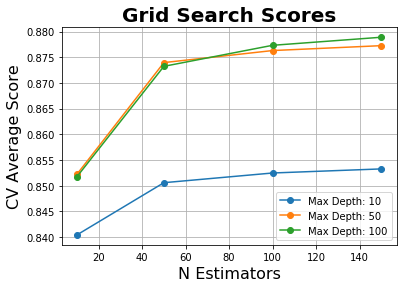

In [185]:
#Plotting code adapted from https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=10)
    ax.grid('on')

max_depth = [10, 50, 100]
n_estimators = [10, 50, 100, 150]

#Plot Grid Search Results
plot_grid_search(grid_search.cv_results_, n_estimators, max_depth, 'N Estimators', 'Max Depth')

In [186]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Model with Tuned Hyperparameters
rf = RandomForestClassifier(n_estimators=150, max_depth=100)
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [187]:
print(rf.score(X_train, Y_train))
print(rf.score(X_test, Y_test))

1.0
0.8772727272727273


In [188]:
#Use Random Forest Model to Predict on Test Data for Kaggle Submission
predicted_classes = rf.predict(test_X)
print(predicted_classes)

[9 1 6 ... 1 1 1]


In [ ]:
#import csv
#
#with open('rf_submission.csv', 'w') as output:
#    writer = csv.writer(output)
#    writer.writerow(["Id","Category"])
#    for i, value in enumerate(predicted_classes):
#        writer.writerow([i,value])
#    
#output.close()

In [193]:

#Reshape Data for Convolutional Neural Network Model
train_X_reshape =  np.array([x.reshape(28,28) for x in train_X])
print(train_X_reshape.shape, train_Y.shape)

test_X_reshape = np.array([x.reshape(28,28) for x in test_X])
print(test_X_reshape.shape)

Training Data Shape :  (55000, 28, 28) (55000,)
Testing Data Shape :  (5000, 28, 28)


Text(0.5, 1.0, 'Label : 4')

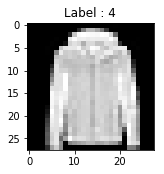

In [194]:
plt.figure(figsize=[5,5])

# Visualize First Datapoint Image
plt.subplot(121)
plt.imshow(train_X_reshape[0,:,:], cmap='gray')
plt.title("Label : {}".format(train_Y[0]))

In [195]:
#Reshape Data for Convolutional Neural Network Model
train_X_reshape = train_X_reshape.reshape(-1, 28,28, 1)
test_X = test_X_reshape.reshape(-1, 28,28, 1)
train_X_reshape.shape, test_X.shape

((55000, 28, 28, 1), (5000, 28, 28, 1))

In [196]:
from keras.utils import to_categorical

# Change Labels from Categorical to One-Hot Encoding
train_Y_categorical = to_categorical(train_Y)

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [197]:
#Test Train Split for CNN Model
from sklearn.model_selection import train_test_split
train_X,valid_X,train_Y,valid_Y = train_test_split(train_X_reshape, train_Y_categorical, test_size=0.2)
train_X.shape,valid_X.shape,train_Y.shape,valid_Y.shape

((44000, 28, 28, 1), (11000, 28, 28, 1), (44000, 10), (11000, 10))

In [198]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

batch_size = 64
epochs = 20
num_classes = 10

#Initial 3-Layer Network Architechture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_38 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 7, 7, 128)         73856     
__________

In [166]:
#trained_model = model.fit(train_X, train_Y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_Y))

Train on 44000 samples, validate on 11000 samples
Epoch 1/20
44000/44000 [==============================] - 5s 113us/step - loss: 0.4831 - acc: 0.8244 - val_loss: 0.3367 - val_acc: 0.8787
Epoch 2/20
44000/44000 [==============================] - 4s 90us/step - loss: 0.2972 - acc: 0.8895 - val_loss: 0.2722 - val_acc: 0.9011
Epoch 3/20
44000/44000 [==============================] - 4s 94us/step - loss: 0.2522 - acc: 0.9069 - val_loss: 0.2518 - val_acc: 0.9074
Epoch 4/20
44000/44000 [==============================] - 4s 95us/step - loss: 0.2186 - acc: 0.9197 - val_loss: 0.2273 - val_acc: 0.9156
Epoch 5/20
44000/44000 [==============================] - 4s 91us/step - loss: 0.1921 - acc: 0.9294 - val_loss: 0.2288 - val_acc: 0.9155
Epoch 6/20
44000/44000 [==============================] - 4s 89us/step - loss: 0.1665 - acc: 0.9380 - val_loss: 0.2194 - val_acc: 0.9208
Epoch 7/20
44000/44000 [==============================] - 4s 90us/step - loss: 0.1481 - acc: 0.9437 - val_loss: 0.2248 - val_ac

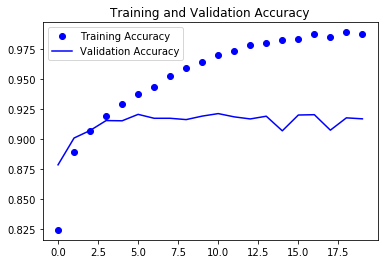

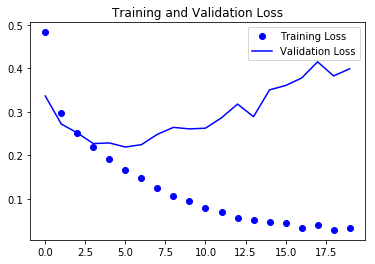

In [168]:
accuracy = trained_model.history['acc']
val_accuracy = trained_model.history['val_acc']
loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [203]:
batch_size = 64
epochs = 20
num_classes = 10

rate = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
val_acc = []

#Add Dropout Layer and Tune Rate Hyperparameter
#for r in rate:
#    model = Sequential()
#    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
#    model.add(LeakyReLU(alpha=0.1))
#    model.add(MaxPooling2D((2, 2),padding='same'))
#    model.add(Dropout(r))
#    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
#    model.add(LeakyReLU(alpha=0.1))
#    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
#    model.add(Dropout(r))
#    model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
#    model.add(LeakyReLU(alpha=0.1))                  
#    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
#    model.add(Dropout(r))
#    model.add(Flatten())
#    model.add(Dense(128, activation='linear'))
#    model.add(LeakyReLU(alpha=0.1))           
#    model.add(Dropout(r))
#    model.add(Dense(num_classes, activation='softmax'))
#
#    #model.summary()
#
#    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
#
#    trained_model_dropout = model.fit(train_X, train_Y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_Y))
#
#    val_acc.append(trained_model_dropout.history['val_acc'][-1])

Train on 44000 samples, validate on 11000 samples
Epoch 1/20
44000/44000 [==============================] - 6s 130us/step - loss: 0.4901 - acc: 0.8201 - val_loss: 0.3785 - val_acc: 0.8593
Epoch 2/20
44000/44000 [==============================] - 4s 96us/step - loss: 0.2976 - acc: 0.8928 - val_loss: 0.2663 - val_acc: 0.9011
Epoch 3/20
44000/44000 [==============================] - 4s 92us/step - loss: 0.2490 - acc: 0.9093 - val_loss: 0.2451 - val_acc: 0.9090
Epoch 4/20
44000/44000 [==============================] - 4s 92us/step - loss: 0.2148 - acc: 0.9210 - val_loss: 0.2469 - val_acc: 0.9082
Epoch 5/20
44000/44000 [==============================] - 4s 91us/step - loss: 0.1884 - acc: 0.9296 - val_loss: 0.2203 - val_acc: 0.9201
Epoch 6/20
44000/44000 [==============================] - 4s 91us/step - loss: 0.1642 - acc: 0.9390 - val_loss: 0.2207 - val_acc: 0.9206
Epoch 7/20
44000/44000 [==============================] - 4s 91us/step - loss: 0.1425 - acc: 0.9461 - val_loss: 0.2278 - val_ac

44000/44000 [==============================] - 4s 99us/step - loss: 0.3137 - acc: 0.8844 - val_loss: 0.2410 - val_acc: 0.9096
Epoch 18/20
44000/44000 [==============================] - 4s 98us/step - loss: 0.3109 - acc: 0.8868 - val_loss: 0.2393 - val_acc: 0.9121
Epoch 19/20
44000/44000 [==============================] - 4s 99us/step - loss: 0.3084 - acc: 0.8847 - val_loss: 0.2282 - val_acc: 0.9127
Epoch 20/20
44000/44000 [==============================] - 4s 100us/step - loss: 0.3064 - acc: 0.8850 - val_loss: 0.2407 - val_acc: 0.9109
Train on 44000 samples, validate on 11000 samples
Epoch 1/20
44000/44000 [==============================] - 7s 161us/step - loss: 0.8956 - acc: 0.6623 - val_loss: 0.5071 - val_acc: 0.7975
Epoch 2/20
44000/44000 [==============================] - 4s 101us/step - loss: 0.5783 - acc: 0.7847 - val_loss: 0.4100 - val_acc: 0.8476
Epoch 3/20
44000/44000 [==============================] - 4s 100us/step - loss: 0.5105 - acc: 0.8115 - val_loss: 0.3766 - val_acc: 0.

[0.9197272726405751, 0.9259090909957886, 0.928454545584592, 0.9284545455412431, 0.9154545455845919, 0.9109090910391374, 0.8991818180517717, 0.8677272726839239, 0.8209999998699535, 0.6506363635930148, 0.9139090907790444]


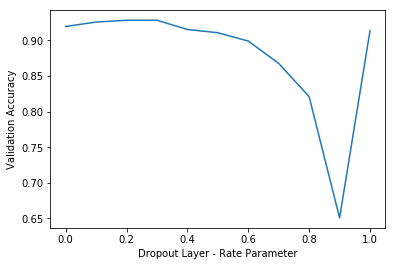

In [205]:
plt.plot(rate, val_acc)
plt.xlabel("Dropout Layer - Rate Parameter")
plt.ylabel("Validation Accuracy")
print(val_acc)

In [206]:
#Convolutional Neural Network with Optimal Dropout Rate
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

trained_model_dropout = model.fit(train_X, train_Y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_Y))

Train on 44000 samples, validate on 11000 samples
Epoch 1/20
44000/44000 [==============================] - 7s 170us/step - loss: 0.5963 - acc: 0.7785 - val_loss: 0.3558 - val_acc: 0.8703
Epoch 2/20
44000/44000 [==============================] - 5s 109us/step - loss: 0.3730 - acc: 0.8628 - val_loss: 0.2959 - val_acc: 0.8881
Epoch 3/20
44000/44000 [==============================] - 5s 113us/step - loss: 0.3237 - acc: 0.8802 - val_loss: 0.2704 - val_acc: 0.8965
Epoch 4/20
44000/44000 [==============================] - 5s 106us/step - loss: 0.2948 - acc: 0.8906 - val_loss: 0.2526 - val_acc: 0.9048
Epoch 5/20
44000/44000 [==============================] - 5s 102us/step - loss: 0.2752 - acc: 0.8983 - val_loss: 0.2393 - val_acc: 0.9111
Epoch 6/20
44000/44000 [==============================] - 5s 102us/step - loss: 0.2575 - acc: 0.9052 - val_loss: 0.2445 - val_acc: 0.9076
Epoch 7/20
44000/44000 [==============================] - 5s 102us/step - loss: 0.2459 - acc: 0.9086 - val_loss: 0.2175 - 

In [202]:
trained_model_dropout.history['val_acc'][-1]

0.9261818180517717

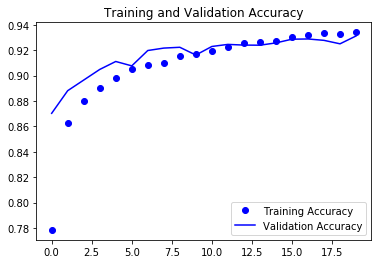

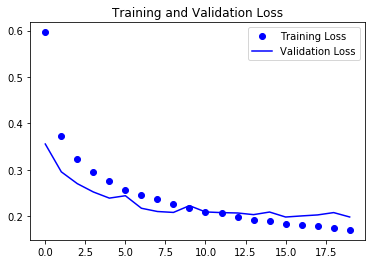

In [207]:
accuracy = trained_model_dropout.history['acc']
val_accuracy = trained_model_dropout.history['val_acc']
loss = trained_model_dropout.history['loss']
val_loss = trained_model_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
#Predict for Kaggle Competition Submission
predicted_classes = model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape

In [ ]:
import csv

with open('cnn_submission.csv', 'w') as output:
    writer = csv.writer(output)
    writer.writerow(["Id","Category"])
    for i, value in enumerate(predicted_classes):
        writer.writerow([i,value])
    
output.close()